#6.1 군집 알고리즘

**타깃을 모르는 비지도 학습**

타깃이 없을 때 사용하는 머신러닝 알고리즘 - 비지도 학습

타깃을 모르는 사진을 종류별로 분류하려 한다... -> 어 그럼 사진의 픽셀값을 평균내서 어떻게 구해볼 수 있지 않을까..??

**과일 사진 데이터 준비하기**

npy파일을 넘파이에서 읽어오자..

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

#앞에 !가 있으면 리눅스 셸의 명령으로 이해한다!
#코랩에 다운됨...

--2021-07-12 06:32:43--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-07-12 06:32:43--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-07-12 06:32:44--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [2]:
#이거를 로드해온다..

import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')

In [3]:
print(fruits.shape)
#300개의 과일 샘플, 그 각각은 100*100의 크기 -> 총 10000개의 픽셀
#삼차원 배열...

(300, 100, 100)


In [4]:
#첫번째 샘플의 첫번째 행 픽셀들..
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


흑백사진은 픽셀값을 0~255 사이의 정숫값을 가진다

0( 어두움 )  ~ 255( 밝음 )

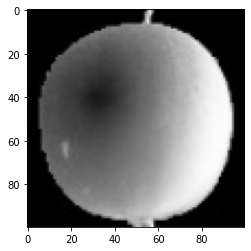

In [5]:
#맷플롯립의 imshow()함수로 쉽게 넘파이배열의 그림을 그릴수 있다..

plt.imshow(fruits[0], cmap = 'gray')        #흑백이미지.. gray
plt.show()

보통 흑백이미지는 물체가 검고 바탕이 밝은데 여기는 반대다..

이거는 사실 원래 흑백이미지를 로드해 올 때 반전시킨 것이다..

- 픽셀값은 어두울수록 0에 가깝고, 밝을수록 255에 가깝다..
- 근데 원래 흑백이미지를 그대로 가져오면 픽셀값이 큰 바탕부분에 컴퓨터가 집중하게된다..
- 그래서 일부러 반전시켜서 물체에 집중하도록 한거다..

근데 이렇게 하니까 물체가 너무 밝아서 보기는 안좋다.. 

-> 매개변수 cmap = 'gray_r'로 지정하면 다시 반전해서 보기 좋게 만든다

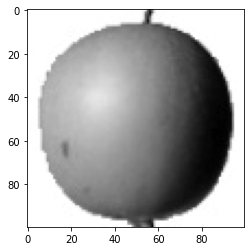

In [6]:
plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

# 밝은 부분은 0에 가깝다.. 어두운 부분은 255에 가깝다..
# 픽셀값은 그대로고 흑백(보이는 것)만 반전시켰다..

이미지 변환과정 정리.. -> 결론 : 우리가 원하는 물체를 어둡게 보이게 하고, 픽셀값도 크게 해서 컴퓨터가 인식을 쉽게하도록 하자

    1) 원래 샘플 npy 파일은 물체가 어둡고(픽셀값이 작다), 바탕이 밝았다(픽셀값이 크다).

    2) npy파일을 넘파이배열로 가져올 때 픽셀값 자체를 반전한다.
        -> 물체가 밝고(픽셀값이 크다), 바탕이 어둡다(픽셀값이 작다).
    
    3) 보기에 안좋으니까 cmap = 'gray_r'이라는 매개변수로 보이는 흑백만 반전했다.
        -> 결국 밝게 보이는 부분(바탕부분)은 픽셀값이 작고, 어둡게 보이는 부분(물체부분)은 픽셀값이 크다

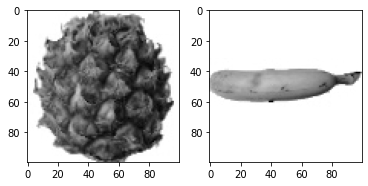

In [7]:
# 이 데이터는 사과 100 파인애플 100 바나나 100이다

fig ,axs= plt.subplots(1,2)
#subplots를 이용해서 한번에..

axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

**픽셀값 분석하기**

하나의 샘플이 지금은 크기가 100*100인 2차원배열인데 배열 계산의 편의성을 위해 길이가 10000인 1차원배열로 바꾼다.. (행이 샘플, 열이 10000개의 픽셀들..)

In [8]:
#reshape함수 이용.. ->
apple = fruits[0:100].reshape(-1,100*100)     #첫번째 인자에 -1이 있으니까 첫번째 크기는 그대로 놔두고 나머지 차원을 10000으로 합치겠다..
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

#모두 100 X 10000의 이차원 배열로 바꾸었다..
#첫번째 차원을 -1로 지정하면 자동으로 남은 차원을 할당한다..

In [9]:
print(apple.shape)
print(pineapple.shape)

(100, 10000)
(100, 10000)


우리가 하려는건 각 샘플별로 픽셀값의 평균을 구하는 것이었다..

-> axis인수를 이용해서 axis=1로 두고 하면 열을 따라(열이 증가하는 방향,,?) 계산함..

In [10]:
#우리가 앞에서 2차원 배열로 바꾸었기 때문에 가능한 계산!!

print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


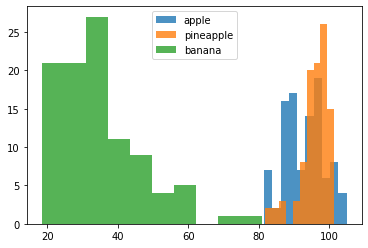

In [11]:
#히스토 그램으로 한번 그려보자

plt.hist(np.mean(apple, axis=1), alpha=0.8)         #alpha 매개변수 : 투명도를 지정함..
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)

plt.legend(['apple','pineapple','banana'])
plt.show()

그래프 분석

1) 바나나의 평균값은 40아래에 집중.., 사과와 파인애플은 90~100사이에 집중..

    -> 바나나는 픽셀 평균값만으로 충분히 구분됨.. 
    -> 바나나가 사진에서 차지하는 영역이 작아서 평균값이 작다..(배경이 0에 가깝다)
    -> 사과와 파인애플은 구분이 힘들다..


2) 사과와 파인애플은 어떻게 구분할까?

    -> 픽셀별 평균값을 계산해보자!
    -> 이러면 좀 다르지 않을까..?

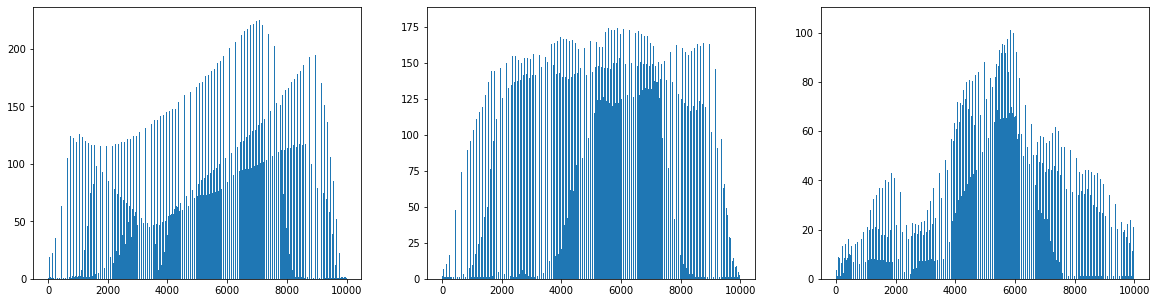

In [12]:
fig, axs=plt.subplots(1,3,figsize=(20,5))
#axs 에 서브그래프의 배열이 저장된다

axs[0].bar(range(10000), np.mean(apple, axis=0))        #axis=0으로 두면 열을 따라(행이 커지는 방향으로) 계산한다.. -> 그럼 픽셀별로 계산하는 것이다!
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

그래프 분석

1) 사과는 사진 아래쪽으로 갈수록 값이 높아진다

    - 픽셀 인덱스가 10000에 가까워질수록 사진의 아래쪽이다..

2) 파인애플은 비교적 고르게 높다

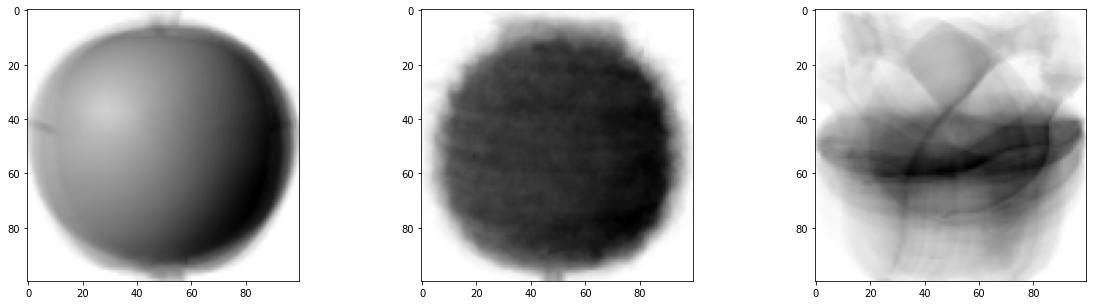

In [13]:
# 각 픽셀의 평균값들을 다시 차원을 바꿔서 100*100의 그림으로 보겠다..
apple_mean = np.mean(apple, axis=0).reshape(100,100)        #다시 크기조정..
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)

fig,axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

과일별로 픽셀 위치에 따라 값이 많이 차이가 난다.. 

-> 이 대표이미지(평균값)와 가까운 사진을 골라내면 구분할 수 있을것이다!!

**평균값과 가까운 사진 고르기**

- 절댓값 오차(abs함수)를 계산..

In [14]:
abs_diff = np.abs(fruits - apple_mean)       #과일 데이터에서 사과평균(사과대표이미지)을 뺌.. 크기(300,100,100)
abs_mean = np.mean(abs_diff, axis=(1,2))      #각 샘플에 대한 평균을 구하려고 axis를 1,2 로 두어 2번째, 3번째 축을 모두 계산함..
print(abs_mean.shape)
#각 샘플마다 평균이니까 결과는 길이가 300인 1차원 배열..

(300,)


그 값이 가장 작은 샘플의 인덱스를 가져와보자..

np.argsort() : 작은 것에서 큰 순서대로 나열한 배열의 인덱스를 반환함..

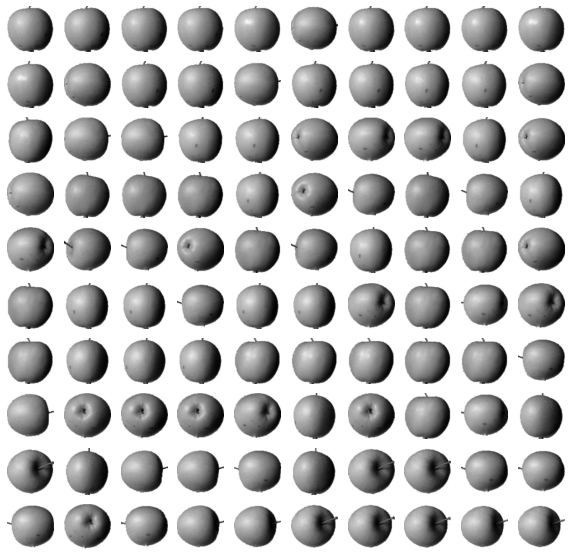

In [15]:
apple_index = np.argsort(abs_mean)[0:100]       #abs_mean이 작은 것부터 100개의 인덱스를 뽑음..
fig, axs = plt.subplots(10,10,figsize=(10,10))

for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')        #좌표 지정안함..
plt.show()
#백 개 전부다 사과다!! -> 완벽..

**군집** : 비슷한 샘플끼리 그룹으로 모으는 작업 / 대표적인 비지도 학습..

**클러스터** : 군집 알고리즘에서 만든 그룹..

앞의 예제는 타깃값을 알고 있었지만 실제 비지도 학습에서는 타깃값을 모르므로 샘플의 평균값을 미리 구할 수 없다..

#6.2 k-평균

찐 비지도 학습에는 사진에 어떤 과일이 들어있는지 모른다!!

**k-평균** 군집알고리즘이 이 평균값을 자동으로 찾아준다!!

평균값이 사실 클러스터의 중심에 위치하기 때문에 **클러스터 중심** 혹은 **센트로이드**라고 부른다!

**k-평균 알고리즘 소개**

작동방식

1) 무작위로 k개의 클러스터 중심을 정한다

2) 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정한다

3) 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경한다.

4) 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복한다.

정리

- 일단 중심 k개 잡고, 그걸 기준으로 가까운거 묶음

- 그 묶인 그룹에서 다시 평균값을 구함..

- 그 새로 구한 평균값을 기준으로 다시 가까운거 묶음..

- 다시 평균값 구함.. -> 이 평균값에 변화가 없을 때 까지 반복함..

**KMeans 클래스**

In [16]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-07-12 06:33:48--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-07-12 06:33:48--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-07-12 06:33:49--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [17]:
#데이터 로드하기.. -> 픽셀값을 아예 반전시켜서 가져옴
#원래 밝은게 픽셀값이 큰데(255에 가까움), 보통 흑백은 물체가 어둡다.. -> 물체의 픽셀값이 작다..
#-> 컴퓨터를 배려해서 반대로 픽셀값 자체를 반전해서 가져온다.. #6.1이랑 똑같음

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)      #얘는 300 X 10000으로 모양 바꾼거..
#kMeans 클래스로 훈련하려면 2차원배열이 필요하다..

**비지도 학습이니까 훈련하는 fit()메서드에 타깃데이터를 안 씀**

In [18]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

군집결과는 labels_속성에 저장됨..

labels_배열의 길이는 샘플 개수와 같다.. -> 각 샘플이 어떤 레이블에 해당되는지 나타냄..

n_cluster = 3 으로 지정했기 때문에 labels_의 종류는 0,1,2임..

In [19]:
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [20]:
#개수 함 세보자
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


In [21]:
#그림을 10개 단위로 출력하기위한 함수 생성

import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)        #총 샘플수..
    #한줄에 샘플 10개씩 그리겠다..
    rows = int(np.ceil(n/10))
    #열의 갯수는 행이 하나 뿐일때는 갯수가 열의 수이고, 아닐때는 항상 10 고정이다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    #axs의 subplot들을 이차원배열의 인덱싱으로도 접근 가능하게 하기 위해서 squeeze=False 매개변수..
    #즉, axs[5][5]이렇게 그림에 접근 가능..
    #https://www.inflearn.com/questions/160111

    for i in range(rows):
        for j in range(cols):
            if i*10+j < n:    #전체 샘플갯수 만큼만..
                axs[i,j].imshow(arr[i*10 +j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

**불리언 인덱싱**으로 그래프를 그려보자..

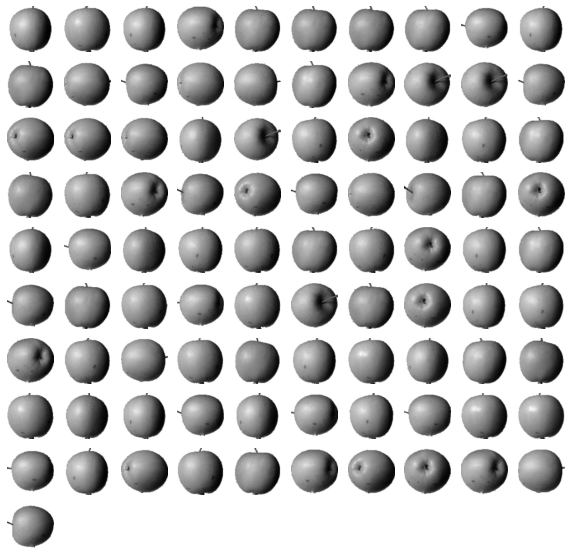

In [22]:
draw_fruits(fruits[km.labels_==0])  #레이블이 0인 인덱스만 가지고와서 배열을 전달..

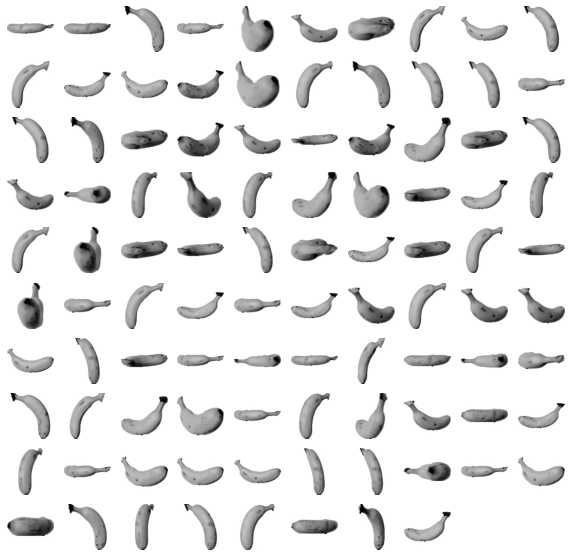

In [23]:
draw_fruits(fruits[km.labels_==1])

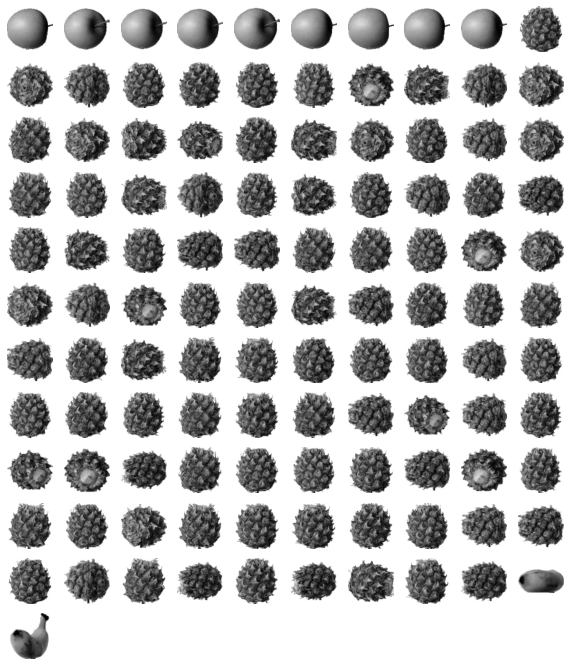

In [24]:
draw_fruits(fruits[km.labels_==2])

오잉 레이블이 2인 클러스터에 파인애플에 사과 9개와 바나나 2개가 섞여있음..

-> 그래도 아주 양호하다..

**클러스터 중심**

최종적으로 찾은건 cluster_centers_에 저장되어있는데, 2d의 중심이므로 다시 크기를 바꿔서 이미지로 출력해야한다

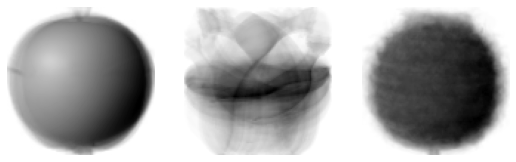

In [25]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio=3)
#앞에서 타깃값을 갖고 했을때랑 비슷하긴하네..

In [26]:
# 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해 주는 transform()메서드..
# -> 특성값을 변환하는 도구로 사용할 수 있다는 의미..
# 얘도 2차원 배열을 넣어줘야 한다!

print(km.transform(fruits_2d[100:101]))     #인덱스가 100인 샘플의 클러스터 중심까지의 거리
# 레이블이 [0, 1, 2]인 클러스터 중심까지의 거리를 반환...
# 이거는 거리가 레이블 2가 가장 작으니까 아마도 예측했을 때 2일 클러스터에 들어있따고 할거다..

[[5267.70439881 8837.37750892 3393.8136117 ]]


In [27]:
print(km.predict(fruits_2d[100:101]))
#그럼 파인애플일거다!!

[2]


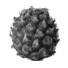

In [28]:
draw_fruits(fruits[100:101])

In [29]:
#몇번 반복해서 중심을 옮겼는지에 대한 매개변수를 저장해놓은 n_iter_ 매개변수
print(km.n_iter_)

3


클러스터 중심을 특성 공학처럼 사용해서 데이터 셋을 저차원으로 변환할 수 있다.. (10000 -> 3)

가까운 거리(transform()메서드)에 있는 클러스터 중심을 샘플의 예측 값으로 사용할 수 있다..

근데 원래는 클러스터의 갯수가 3이라는 것도 모른다!! -> 어떻게 n_clusters를 지정해야하나??

**최적의 K 찾기**

k - 평균 알고리즘의 단점 중 하나는 클러스터 개수를 사전에 지정해야 한다는 것..

-> 실전에서는 클러스터가 몇개인지 모른다..

-> 어떻게 최선의 k값을 찾는가??

- 완벽한 방법은 없고,, 대표적으로는 **엘보우** 방법이 있다..

- 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있다.. -> 이 거리의 제곱 합을 **이니셔**라고 부른다

- **이니셔**를 클러스터에 속한 샘플이 얼마나 가깝게 모여있는지를 나타내는 값으로 생각할 수 있다..

- 일반적으로 클러스터 개수가 늘어나면 클러스터 개개의 크기는 줄어들기 때문에 이니셔도 줄어든다..

- **엘보우** 방법은 클러스터 크기를 늘려가면서 이니셔의 변화를 관찰하면서 최적의 클러스터 개수를 찾는다..

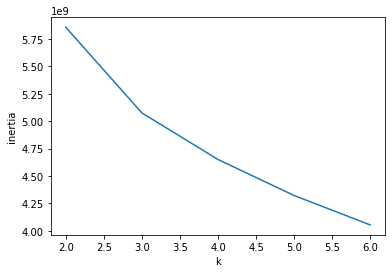

In [30]:
#클러스터 갯수를 2~6까지 바꿔가며 훈련한다..
inertia = []
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)     #자동으로 이니셔 값을 inertia_매개변수에 저장한다..

plt.plot(range(2,7), inertia)       #그 훈련값을 저장하고 그래프 그린다
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

- 이니셔가 감소하는데, 감소하는 속도가 꺾이는 지점이 있다..
- 즉 그다음에 이니셔가 크게 줄어들지 않는다.. 
- 그 지점이 최적의 클러스터의 갯수다!

#6.3 주성분 분석

샘플이 너무 많이 들어와서 저장공간이 부족해졌다.. 군집/분류에 영향을 끼치지 않고 용량을 줄일 수 있을까??

-> 이 때 차원 축소를 한다..

**차원과 차원 축소**

머신러닝에서의 차원 <=> 특성

ex) 10000개의 픽셀값 <=> 10000개의 특성 <=> 10000개의 차원

cf) 

    일차원 배열에서의 차원 : 원소의 갯수

    다차원 배열에서의 차원 : 축의 갯수

**차원 축소**는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.

- 선형모델에서 차원이 많을수록 성능은 좋아지지만 훈련세트에 과대적합될 가능성도 높았다..

**주성분 분석(PCA) 소개**

데이터에 있는 분산이 큰 방향을 찾는 것!!

**분산** : 데이터가 널리 퍼져있는 정도

분산이 큰 방향 <=> 데이터를 잘 표현하는 벡터..

중요한 것은 방향!!

그 방향을 나타내는 벡터를 **주성분**이라고 한다

**주성분 벡터**의 원소의 개수는 원본 데이터셋의 특성 개수와 같다

하지만 원본 데이터는 주성분을 이용해 차원을 줄일 수 있다!!!

-> 주성분 벡터로 데이터 샘플들을 수직으로 내린다..

중요!!

    - 주성분은 원본 데이터셋과 차원이 같다.. 단지 한 방향을 나타내는 벡터이다..

    - 주성분으로 바꾼 원본 데이터들의 차원을 줄어든다.. (수직으로 내린다..)

첫 번째 주성분을 찾은 다음에 이 벡터에 수직이고 분산이 가장 큰 다음방향을 찾는다.. -> 두번째 주성분!

- 선대의 gram-schmidt정리
    
    independent한 n개의 벡터를 n개의 orthogonal한 벡터들로 만들 수 있다..

**PCA 클래스**

이제 과일 사진 데이터를 주성분 분석 해보자..

In [31]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

--2021-07-12 06:34:09--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-07-12 06:34:09--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-07-12 06:34:09--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [32]:
# PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 갯수를 지정해야 한다..

from sklearn.decomposition import PCA
pca = PCA(n_components = 50)        #주성분을 50개를 찾겠다
pca.fit(fruits_2d)  #얘도 이차원을 주고, 타깃데이터를 훈련에 안씀.. 없으니까

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
print(pca.components_.shape)

#첫차원이 50 : 주성분이 50개란 말
#두번째 차원이 10000 : 항상 원본 데이터의 특성 개수와 같은 10000

(50, 10000)


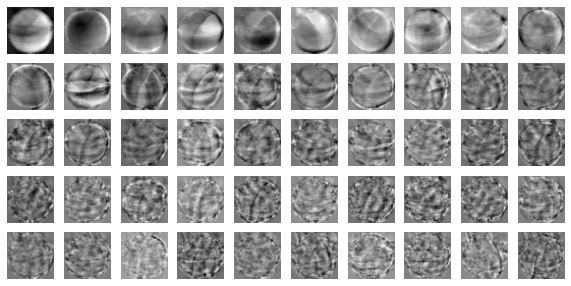

In [34]:
#이미지로 출력을 해보자.. 주성분을..

draw_fruits(pca.components_.reshape(-1, 100,100))
# 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다..
# 어떤 특징을 잡아낸 것처럼 생각할 수도 있다..

In [35]:
# 이제 원본데이터를 주성분에 투영해서 차원축소를 할 수있다!! 50차원으로!!
# 마치 각 주성분으로 분해하는 것...(50차원의 공간에 때려박는것..)

print(fruits_2d.shape)
# 원래 10000차원..

(300, 10000)


In [36]:
fruits_pca = pca.transform(fruits_2d)       #차원축소..
print(fruits_pca.shape)         #50차원으로 바뀜!

#이를 원상복구도 할 수 있을까??
#투비 컨티뉴..

(300, 50)


**원본 데이터 재구성**

PCA 클래스는 원본 데이터를 재구성할 수 있게 inverse_transform()메서드를 제공..

-> 다시 10000차원으로!!

In [37]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


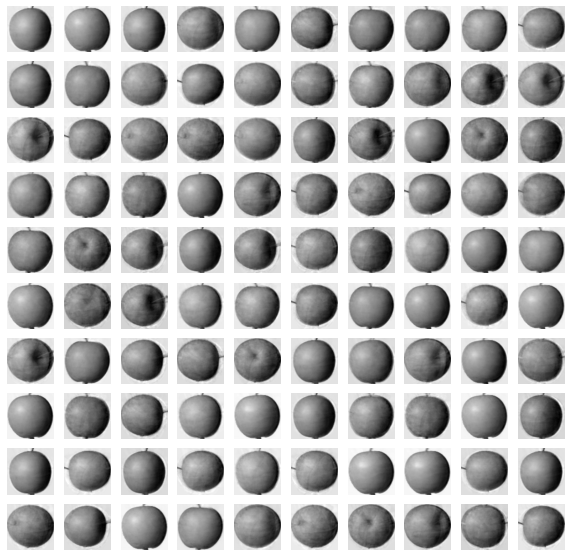

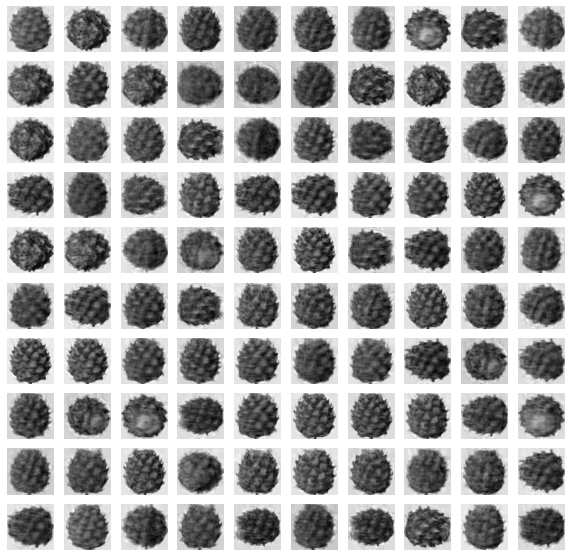

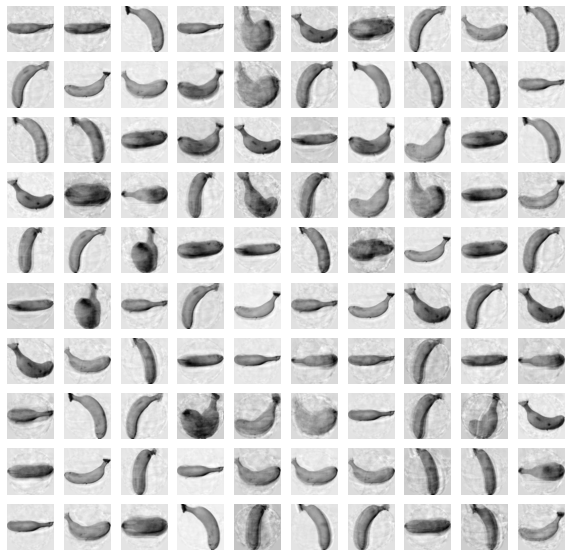

In [38]:
# 100개씩 순서대로 나누어서 그림을 출력하자..

fruits_reconstruct = fruits_inverse.reshape(-1,100,100) #이미지 출력을 위한 변환
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])    #백개씩...
    print("\n")

굉장히 잘 복원했다.. -> 50개의 특성이 분산을 가장 잘 보존하도록 변환된 것이기 때문에 잘 복원됨..

주성분을 최대로 사용한다면 더 잘 복원가능..

그럼 50개의 특성은 얼마나 분산을 보존하고 있는 것일까??

**설명된 분산**

: 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

: pca 클래스의 explained_variance_ratio_에 저장됨..

: 당연히 첫 주성분의 비율이 가장 높고, 모든 주성분(50개)의 비율을 더하면 50개의 주성분으로 표현하는 분산비율을 얻을 수 있음..

In [39]:
print(np.sum(pca.explained_variance_ratio_))

#92프로의 분산을 표현하고 있다..
#이러니까 복원 시 품질이 높다..

0.9215614883080807


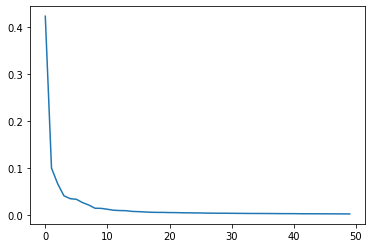

In [40]:
#설명된 분산의 비율을 그래프로 그리면 적절한 주성분 갯수를 찾는데 도움이 됨..

plt.plot(pca.explained_variance_ratio_)
plt.show()

#처음 10개의 주성분이 대부분의 분산을 표현하는 중..

**다른 알고리즘과 함께 사용하기**

pca로 차원 축소된 데이터를 사용해서 지도학습 모델을 훈련해보자..(not 비지도!)

In [41]:
#로지스틱 회귀 모델

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [42]:
#지도모델을 위한 타깃값 생성 (0: 사과, 1: 파인애플, 2: 바나나)
target = np.array([0]*100 + [1]*100 + [2]*100)

In [43]:
#원본데이터로 회귀모델 성능 확인..

from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))        #교차검증 점수의 평균..
print(np.mean(scores['fit_time']))          #훈련시간..

#특성이 10000개나 되어서 300개의 샘플에 과대적합되기 쉬움..

0.9966666666666667
1.5147341728210448


In [46]:
#차원축소된 데이터로 성능확인..

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.031652069091796874


50개의 특성만 사용했는데 정확도 100, 시간은 엄청나게 줄었다..

n_components 매개변수에 주성분의 개수를 지정했는데, 이 대신에 설명된 분산의 비율을 입력할 수 있다..

- 0~1사이의 값이면 원하는 비율이다..

In [47]:
#전체 분산의 50%를 표현하는 주성문을 찾도록 하는 모델..

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)  #당연히 원본데이터..

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [48]:
print(pca.n_components_)        #찾은 주성분의 갯수

2


In [49]:
#이걸로 한번 원본데이터를 편환해서 함 보자..
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [50]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

#성능이 99퍼고 시간도 짧다..

0.9933333333333334
0.04766678810119629


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [53]:
#차원 축소된 것을 이용해 k-평균 알고리즘으로 클러스터를 함 찾아보자..

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

#원본을 사용해서 얻었던 결과와 비슷하다..

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


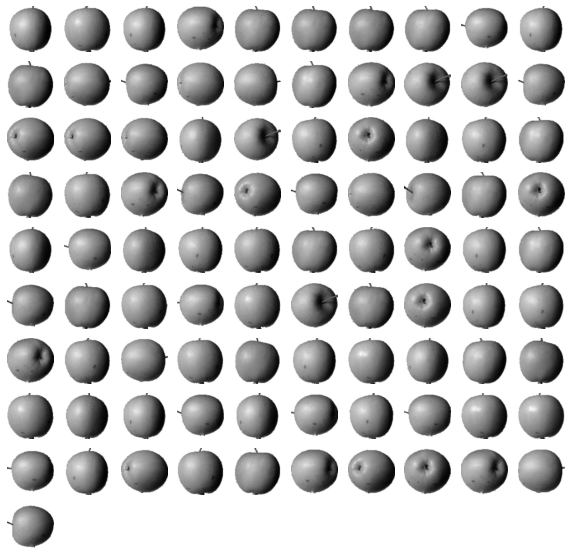

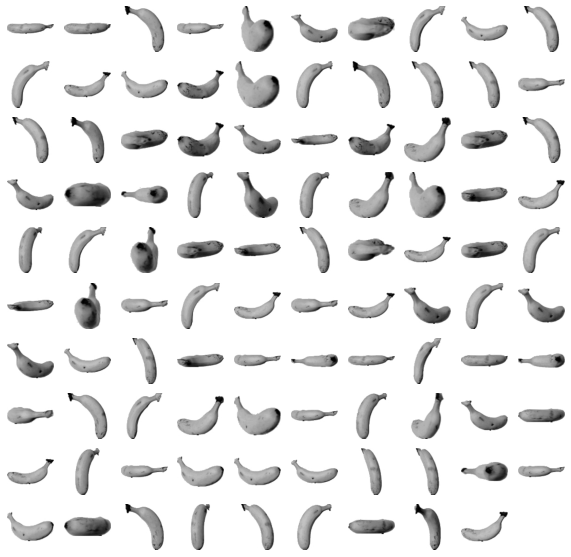

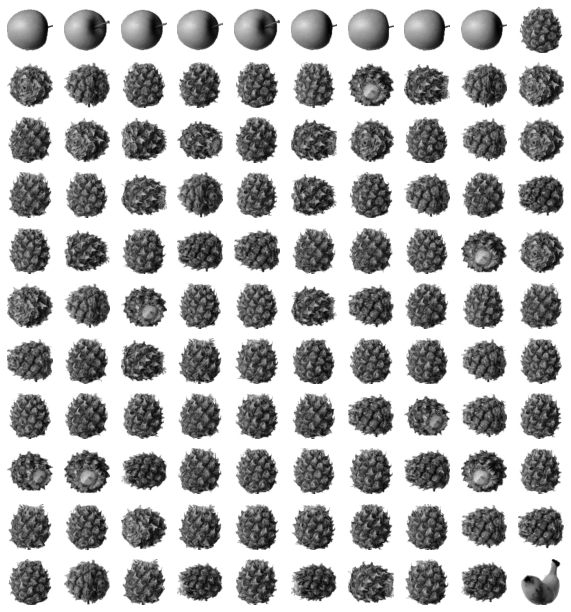

In [54]:
# KMeans가 찾은 레이블로 과일 이미지 출력..

for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

훈련데이터의 차원을 줄이면 좋은 점은 시각화.. -> 3개 이하의 차원으로 줄이면 화면에 출력하기 쉽다..

-> fruits_pca 데이터는 2개의 특성이 있다.. 2차원 표현 가능!

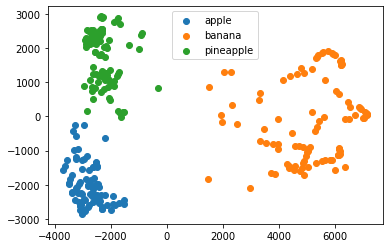

In [55]:
for label in range(0,3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0], data[:,1])       #첫번째 특성값을 x축, 두번째 특성값을 y축으로 두고 산점도..
    
plt.legend(['apple','banana','pineapple'])  #레이블 1:사과 2:바나나 3:파인애플
plt.show()

- 산점도가 아주 잘 보인다..
- 사과와 파인애플이 아주 가까이 붙어있다..-> 두 클러스터는 혼동을 일으킬 수 있다..
- 이런 예상치 못한 통찰을 얻을 수 있는게 또하나의 장점이다..

**결론**

차원축소하면 좋은 점

    - 데이터의 용량이 줄어든다
    - 과대적합을 줄일 수도 있다
    - 축소된 데이터로 훈련시간을 줄일 수도 있다.
    - 시각화에도 좋다..(3개이하의 차원으로 줄였을 때)

PCA클래스에서 다 구현가능하다..

    - n_components_ 매개변수로 주성분 갯수 혹은 설명된 분산의 비율을 지정가능
    - inverse_transform()메서드로 복원도 가능.. 설명된 분산이 클수록 복원이 정확함..